# Домашнее задание №3
Задание выполнил: Пешков Максим

Общая информация
Дата выдачи: 08.04.2020

# Дедлайн: 23:59 26.04.2020


# Подготовка данных

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [51]:
import re

In [52]:
data = pd.read_csv('avito_data.csv')

In [53]:
data.head()

,id,title,description,Category_name,Category
0,382220,Прихожая,В хорошем состоянии. Торг,Мебель и интерьер,20
1,397529,Кордиант 215/55/16 Летние,Кордиант 215/55/16 Летние/\r\n /\r\nАртикул: 1...,Запчасти и аксессуары,10
2,584569,Стол,"Стол, 2 рабочих места . Стол серого цвета, в д...",Мебель и интерьер,20
3,2513100,Комбинезон,Размер-42/44,"Одежда, обувь, аксессуары",27
4,1091886,Ветровка,На 2 года,Детская одежда и обувь,29


In [54]:
data.shape

(30000, 5)

In [55]:
X = data[['title', 'description']].to_numpy()
y = data['Category'].to_numpy()

del data

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
X_train[:5]

array([['Сапоги 46 размер новые', 'Сапоги 46 размер новые'],
       ['Светильники потолочный swarovski',
        'светильники потолочные swarovski 6 штук , цена за штуку. В эксплуатации 2 года , продаются в связи со сменой интерьера в квартире'],
       ['iPhone 7 plus 128GB Red красный в наличии',
        '\xa0/\r\n/\r\n Данная цена только для подписчиков Instagram: iQmac/\r\n/\r\n Новый красный айфон 7 Plus в наличии это элегантный и мощный смартфон, который готов в полной мере раскрыть новые возможности iOS 10. Аппарат с 4-ядерным процессором А10 и 3 ГБ ОЗУ с легкостью решает самые ресурсоемкие задачи, позволяя наслаждаться быстродействием «тяжелых» приложений и игр на 5,5-дюймовом дисплее. Аппарат получил экран, как у iPad Pro, так что картинка теперь соответствует кинематографическому стандарту.'],
       ['Пион Ирис Ромашка рассада',
        'Пион куст 500 р ( более 10 шт)/\r\nСаженец/ корень 100р/\r\nРастут у нас более 70 лет/\r\nРозовые, бордовые и белые/\r\nНа фото цветы 2018г

In [58]:
y_train[:5]

array([ 27,  20,  84, 106,  27], dtype=int64)

# Токенизация (0.5 балла)
Токенизация -- разбиение текста на мелкие части, которые можно обработать машинными методами. Можно использовать разные алгоритмы токенизации. В данном задании мы будем использовать WordPunctTokenizer.

In [59]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()

text = 'Здраствуйте. Я, Кирилл. Хотел бы чтобы вы сделали игру, 3Д-экшон суть такова...'

print("before:", text,)
print("after:", tokenizer.tokenize(text.lower()))

before: Здраствуйте. Я, Кирилл. Хотел бы чтобы вы сделали игру, 3Д-экшон суть такова...
after: ['здраствуйте', '.', 'я', ',', 'кирилл', '.', 'хотел', 'бы', 'чтобы', 'вы', 'сделали', 'игру', ',', '3д', '-', 'экшон', 'суть', 'такова', '...']


In [60]:
def preprocess(text: str, tokenizer) -> str:
    """
    Данная функция принимает на вход текст, 
    а возвращает тот же текст, но с пробелами между каждым токеном
    """
    t = tokenizer.tokenize(text.lower())
    return ' '.join(t)

In [61]:
assert preprocess(text, tokenizer) == 'здраствуйте . я , кирилл . хотел бы чтобы вы сделали игру , 3д - экшон суть такова ...'

## Задание: 

Токенизируйте 'title' и 'description' в train и test.

In [62]:
X_train_new = []
for i in tqdm(range(len(X_train))):
    X_train_new.append([preprocess(X_train[i][0], tokenizer), preprocess(X_train[i][1], tokenizer)])
X_train = X_train_new
X_test_new = []
for j in tqdm(range(len(X_test))):
    X_test_new.append([preprocess(X_test[j][0], tokenizer), preprocess(X_test[j][1], tokenizer)])
X_test = X_test_new

100%|███████████████████████████████████████████████████████████████████████████| 9000/9000 [00:00<00:00, 16301.25it/s]


In [63]:
assert X_train[5][0] == '1 - к квартира , 33 м² , 4 / 5 эт .'
assert X_train[10][1] == 'продам иж планета 3 , 76 год , ( стоит на старом учёте , документы утеряны ) на ходу , хорошее состояние , все интересующие вопросы по телефону ( с родной коляской на 3 тысячи дороже ) . торга не будет .'
assert X_test[2][0] == 'фара правая toyota rav 4 галоген 2015 - 19'
assert X_test[2][1] == 'фара правая для toyota rav4 2015 / оригинальный номер : 8113042650 / тойота рав4 тоета рав 4 / производитель : toyota / состояние : отличное без дефектов ! / комментарий : после 2015 не ксенон галоген + диод / пожалуйста , уточняйте соответствие вашего заказа изображенному на фото . / звоните уточняйте по наличию предоставляется время на проверку детали / отправляем в регионы рф транспортными компаниями / . / всегда включен вайбер вацап по вопросам !/ дополнительное фото по запросу'

# BOW (3 балла)

Один из традиционных подходов -- построение bag of words.

Метод состоит в следующем:

Составить словарь самых часто встречающихся слов в train data
Для каждого примера из train посчитать, сколько раз каждое слово из словаря в нём встречается
В sklearn есть CountVectorizer, но в этом задании его использовать нельзя.

## Задание: 

Cоздайте словарь, где каждому токену соответствует количество раз, которое оно встретилось в X_train.

In [64]:
X_all = []
for i in range(len(X_train)):
    X_all.append(X_train[i][0].split(' '))
    X_all.append(X_train[i][1].split(' '))

In [65]:
tokens_cnt = {}
for token in X_all:
    for toks in token:
        try:
            tokens_cnt.update({toks: tokens_cnt[toks] + 1})
        except KeyError:
            tokens_cnt.update({toks: 1})

In [66]:
assert tokens_cnt['сапоги'] == 454

## Задание 
выведите 10 самых частотных и 10 самых редких токенов.

In [67]:
sorted(list(tokens_cnt.items()), key=lambda x: x[1])[-10:]

[('с', 12860),
 (':', 15098),
 ('./', 17639),
 ('на', 19465),
 ('и', 21714),
 ('в', 28337),
 ('-', 36840),
 ('.', 65624),
 (',', 79117),
 ('/', 85802)]

In [68]:
sorted(list(tokens_cnt.items()), key=lambda x: x[1])[:10]

[('iqmac', 1),
 ('ядерным', 1),
 ('ресурсоемкие', 1),
 ('быстродействием', 1),
 ('кинематографическому', 1),
 ('ирис', 1),
 ('саженец', 1),
 ('корень', 1),
 ('зубчаниновка', 1),
 ('боярышник', 1)]

## Задание:
оставьте в словаре только топ-10000 самых частотных токенов, также создайте отдельный список из этих слов.

In [69]:
new_dict = {}
tokens_list =[]
a = sorted(list(tokens_cnt.items()), key=lambda x: x[1])[-10000:]
for para in a:
    new_dict.update({para[0]: para[1]})
    tokens_list.append(para[0])
tokens_cnt = new_dict

## Задание: 

Реализуйте функцию, которая переводит текст в вектор из чисел. То есть каждому токену из списка токенов сопоставляется количество раз, которое он встретился в тексте.

In [70]:
def text_to_bow(text: str, tokens_list: list) -> np.array:
    """
    Возвращает вектор, где для каждого слова из словаря
    указано количество его употреблений в предложении
    input: строка, список токенов
    output: вектор той же размерности, что и список токе/нов
    """
    list_return = np.zeros(len(tokens_list))
    find_str = tokenizer.tokenize(text)
    for element in find_str:
        try:
            list_return[tokens_list.index(element)] += 1
        except ValueError:
            pass   
    return list_return 

In [71]:
example_text = text_to_bow("сдаётся уютный , тёплый гараж для стартапов в ml", tokens_list)

assert np.allclose(example_text.mean(), 0.0008)

## Задание: 

а теперь реализуйте функцию, которая преобразует наш датасет и каждому тексту из 'description' сопоставляет вектор.

In [72]:
def descr_to_bow(items: np.array, tokens_list: list) -> np.array:
    """ Для каждого описания товара возвращает вектор его bow """
    gg_bow = []
    for i in range(len(items)):
        gg_bow.append(text_to_bow(items[i][1], tokens_list))
    return np.asarray(gg_bow)

In [73]:
X_train_bow = descr_to_bow(X_train, tokens_list)
X_test_bow = descr_to_bow(X_test, tokens_list)

In [74]:
assert X_train_bow.shape == (21000, 10000), X_test_bow.shape == (9000, 10000)
assert 0.005 < X_train_bow.mean() < 0.006
assert 0.005 < X_test_bow.mean() < 0.006

# Логистическая регрессия и SVC (0.5 балла)

Теперь описание каждого товара представлено, как точка в многомерном пространстве. Очень важно запомнить эту идею: дальше мы будем рассматривать разные способы перехода от текста к точке в пространстве.

Для BOW каждое измерение в пространстве -- какое-то слово. Мы предполагаем, что текст описывается набором каких-то популярных слов, которые в нём встречаются, а близкие по смыслу тексты будут использовать одинаковые слова.

Обучите логистическую регрессию и SVM с линейным ядром (sklearn.svm.LinearSVC или sklearn.svm.SVC(kernel='linear')) с базовыми параметрами. При необходимости можете увеличить максимальное число итераций. В качестве random_state возьмите 13.

Подсказка: для того, чтобы было проще обучать, можно использовать [разреженные матрицы](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D1%80%D0%B5%D0%B6%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) - многие модели из sklearn умеют с ними работать. Соответствующий модуль из scipy: scipy.sparse. Нетрудно заметить, что в полученных BOW-матрицах очень много нулей. Если хранить в памяти только ненулевые элементы, можно сильно оптимизировать вычисления. Можете в этом убедиться:_

In [75]:
print('Train array in memory (raw): {:.3f} Mb'.format(X_train_bow.nbytes * 1e-6))

from scipy.sparse import csr_matrix
X_train_bow_csr = csr_matrix(X_train_bow)
print('Train array in memory (compressed): {:.3f} Mb'.format(
    (X_train_bow_csr.data.nbytes + X_train_bow_csr.indptr.nbytes + X_train_bow_csr.indices.nbytes) * 1e-6)
)

Train array in memory (raw): 1680.000 Mb
Train array in memory (compressed): 8.603 Mb


In [76]:
import sklearn
from sklearn.metrics import accuracy_score

In [77]:
LogReg = sklearn.linear_model.LogisticRegression(max_iter=1000000, random_state=13)

In [78]:
LogReg.fit(X_train_bow, y_train)
y_pred = LogReg.predict(X_test_bow)
accuracy_score(y_test, y_pred)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7052222222222222

In [79]:
assert accuracy_score(y_test, y_pred) > 0.695

In [80]:
SVM = sklearn.svm.LinearSVC()

In [81]:
SVM.fit(X_train_bow, y_train)
y_pred2 = SVM.predict(X_test_bow)
accuracy_score(y_test, y_pred2)

C:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6828888888888889

In [82]:
assert accuracy_score(y_test, y_pred2) > 0.68

# Модификация признаков (2 балла)

## Задание
Прибавьте к соответствующим BOW-векторам BOW-вектора для 'title' товара с некоторым весом. Изменится ли качество? Как вы можете это объяснить?

In [83]:
def des_to_bow(items: np.array, tokens_list: list) -> np.array:
    """ Для каждого описания товара возвращает вектор его bow """
    gg_bow0 = []
    for i in range(len(items)):
        gg_bow0.append(text_to_bow(items[i][0], tokens_list))
    return np.asarray(gg_bow0) + descr_to_bow(items, tokens_list)

In [86]:
X_train_bow_all = des_to_bow(X_train, tokens_list)
X_test_bow_all = des_to_bow(X_test, tokens_list)

In [87]:
X_train_bow_all = csr_matrix(X_train_bow_all)
X_test_bow_all = csr_matrix(X_test_bow_all)

In [88]:
LogReg.fit(X_train_bow_all, y_train)
y_pred_all = LogReg.predict(X_test_bow_all)
accuracy_score(y_test, y_pred_all)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7841111111111111

In [89]:
SVM.fit(X_train_bow_all, y_train)
y_pred_all2 = SVM.predict(X_test_bow_all)
accuracy_score(y_test, y_pred_all2)

C:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.754

**Вывод:** Качество улучшилось, так как стало больше признаков и информации о словах соответственно

## Задание
Нормализуйте данные с помощью MinMaxScaler или MinAbsScaler перед обучением. Что станет с качеством и почему?

In [90]:
from sklearn.preprocessing import MaxAbsScaler

In [91]:
scaler = MaxAbsScaler()

In [92]:
scaler = MaxAbsScaler()
X_train_bow_norm = scaler.fit_transform(X_train_bow_all)
X_test_bow_norm = scaler.fit_transform(X_test_bow_all)

In [93]:
LogReg.fit(X_train_bow_norm, y_train)
y_pred_norm = LogReg.predict(X_test_bow_norm)
accuracy_score(y_test, y_pred_norm)

0.7293333333333333

In [94]:
SVM.fit(X_train_bow_norm, y_train)
y_pred_norm2 = SVM.predict(X_test_bow_norm)
accuracy_score(y_test, y_pred_norm2)

0.7586666666666667

**Вывод:** качество упало на LogReg, а на SVM практически не изменилось, это связано с тем, что регрессия более чувствительна к масштабированию, причем если признаки были нормальными (не нужно было масштабирование), то масштабирование ухудшает качество

*Почему в данном случае использовать StandardScaler - не очень хорошая идея?*

Использовать стандартизацию не очень хорошая идея, так как даже при масштабировании MaxAbsScaler стало хуже (оно не нужно, у нас все хорошо и так), который при этом загоняет все в (-1,1), а при стандартизации в (0,1) будет еще хуже

# Иная предобработка (1 балл)

Добавьте к предобработке стэмминг.

Сравните полученное сейчас качество с полученным ранее и сделайте вывод.

Выберем Стемминг *SnowballStemmer*

In [95]:
from nltk.stem.snowball import SnowballStemmer

In [96]:
stemmer = SnowballStemmer('russian')

In [97]:
X_all_stem = []
for i in range(len(X_train)):
    for w in X_train[i][0].split(' '):
        X_all_stem.append(stemmer.stem(w))
    for w in X_train[i][1].split(' '):
        X_all_stem.append(stemmer.stem(w))

In [98]:
tokens_cnt_1 = {}
for token in X_all_stem:
    try:
        tokens_cnt_1.update({token: tokens_cnt_1[token] + 1})
    except KeyError:
        tokens_cnt_1.update({token: 1})

In [99]:
sorted(list(tokens_cnt_1.items()), key=lambda x: x[1])[-10:]

[('с', 12860),
 (':', 15098),
 ('./', 17639),
 ('на', 19492),
 ('и', 21719),
 ('в', 28337),
 ('-', 36840),
 ('.', 65624),
 (',', 79117),
 ('/', 85802)]

In [100]:
new_dict_1 = {}
tokens_list_1 =[]
b = sorted(list(tokens_cnt_1.items()), key=lambda x: x[1])[-10000:]
for para in b:
    new_dict.update({para[0]: para[1]})
    tokens_list_1.append(para[0])
tokens_cnt_1 = new_dict_1

In [101]:
def text_to(text: str, tokens_list: list) -> np.array:
    list_return = np.zeros(len(tokens_list))
    find_str = [stemmer.stem(w) for w in text.split()]
    for element in find_str:
        try:
            list_return[tokens_list.index(element)] += 1
        except ValueError:
            pass   
    return list_return 

def d_to_bow(items: np.array, tokens_list: list) -> np.array:
    gg_bow = []
    for i in range(len(items)):
        gg_bow.append(text_to(items[i][1], tokens_list))
    return np.asarray(gg_bow)

def de_to_bow(items: np.array, tokens_list: list) -> np.array:
    gg_bow0 = []
    for i in range(len(items)):
        gg_bow0.append(text_to(items[i][0], tokens_list))
    return np.asarray(gg_bow0) + d_to_bow(items, tokens_list)

In [104]:
X_train_lem = de_to_bow(X_train, tokens_list_1)

In [105]:
X_test_lem = de_to_bow(X_test, tokens_list_1)

In [106]:
X_train_lem = csr_matrix(X_train_lem)
X_test_lem = csr_matrix(X_test_lem)

In [107]:
LogReg.fit(X_train_lem, y_train)
y_pred_lem = LogReg.predict(X_test_lem)
accuracy_score(y_test, y_pred_lem)

0.8036666666666666

In [108]:
SVM.fit(X_train_lem, y_train)
y_pred_lem2 = SVM.predict(X_test_lem)
accuracy_score(y_test, y_pred_lem2)

0.7742222222222223

**Вывод:** Качество выросло! Это связано с тем, что стемминг работает не с полным словом, а с однокоренными (выбранный откидывает окончания и суффиксы), что, на самом деле, не влияет на наш результат (обычно однокоренные слова несут примерно один смысл), поэтому его лучше использовать для прогноза

# TF-IDF (5 баллов)

Не все слова полезны одинаково, давайте попробуем взвесить их, чтобы отобрать более полезные.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

В sklearn есть TfidfVectorizer, но в этом задании его использовать нельзя. Для простоты посчитайте общий tf-idf для 'title' и 'description' (то есть каждому объекту надо сопоставить вектор, где как документ будет рассматриваться конкатенация 'title' и 'description').

## Задание: 

Cоставьте словарь, где каждому слову из изначального списка будет соответствовать количество документов из train-части, где это слово встретилось.

In [109]:
X_all_items = []
for i in tqdm(range(len(X_train))):
    X_all_items.append(X_all[2*i] + X_all[2*i+1])

100%|██████████████████████████████████████████████████████████████████████████| 21000/21000 [00:05<00:00, 3557.89it/s]


In [110]:
word_document_cnt = {}
for token in tqdm(tokens_list):
    i = 0
    for toks in X_all_items:
        if token in toks:
            i += 1
    word_document_cnt.update({token: i})

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:04<00:00, 41.34it/s]


In [111]:
assert word_document_cnt['размер'] == 2839

## Задание: 
реализуйте функцию, где тексту в соответствие ставится tf-idf вектор. Для вычисления IDF также необходимо число документов в train-части (параметр n_documents_total).

In [112]:
def text_to_tfidf(text: str, word_document_cnt: dict, tokens_list: list, n_documents_total: int) -> np.array:
    """
    Возвращает вектор, где для каждого слова из словаря
    указан tf-idf
    """
    vector_TF = np.zeros(len(tokens_list))
    spisok = text.split(' ')
    for i in spisok:
        try:
            TF = spisok.count(i) / len(spisok)
            vector_TF[tokens_list.index(i)] = TF
        except ValueError:
            pass
            
    vector_IDF = np.zeros(len(tokens_list))
    for i in spisok:
        try:
            IDF = np.log(n_documents_total / word_document_cnt[i])
            vector_IDF[tokens_list.index(i)] = IDF
        except KeyError or ValueError:
            pass
      
    vector = np.zeros(len(tokens_list))
    for i in range(len(tokens_list)):
        vector[i] = vector_TF[i] * vector_IDF[i]
    return vector

In [113]:
example_text = text_to_tfidf(
    'сдаётся уютный , тёплый гараж для стартапов в ml',
    word_document_cnt,
    tokens_list,
    n_documents_total=len(X_train)
)
assert 0.0003 < example_text.mean() < 0.0004

## Задание: 
а теперь реализуйте функцию, которая преобразует наш датасет и для каждого объекта сопоставляет вектор tf-idf. В качестве текстов используйте конкатенацию 'title' и 'description'

In [116]:
def items_to_tfidf(items: np.array, word_document_cnt: dict, tokens_list: list, n_documents_total: int) -> np.array:
    """
    Для каждого товара возвращает его tf-idf вектор
    """
    respek = []
    tf_idf_respek = []
    for i in range(len(items)):
        respek.append(items[i][0] + ' ' + items[i][1])
    for i in range(len(items)):
        tf_idf_respek.append(text_to_tfidf(respek[i], word_document_cnt, tokens_list, n_documents_total))
    return np.asarray(tf_idf_respek)

In [117]:
X_train_tfidf = items_to_tfidf(X_train, word_document_cnt, tokens_list, len(X_train))

In [118]:
X_test_tfidf = items_to_tfidf(X_test, word_document_cnt, tokens_list, len(X_train))

In [119]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train_tfidf_norm = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_norm = scaler.fit_transform(X_test_tfidf)

In [120]:
assert X_train_tfidf.shape == (21000, 10000) 
assert X_test_tfidf.shape == (9000, 10000)
assert 0.0002 < X_train_tfidf.mean() < 0.0004
assert 0.0002 < X_test_tfidf.mean() < 0.0004

## Задание: 
обучите логистическую регрессию и SVC, оцените качество (accuracy_score). Сделайте вывод.

In [121]:
X_train_tfidf_norm = csr_matrix(X_train_tfidf_norm)
X_test_tfidf_norm = csr_matrix(X_test_tfidf_norm)

In [122]:
X_train_tfidf = csr_matrix(X_train_tfidf)
X_test_tfidf = csr_matrix(X_test_tfidf)

In [123]:
LogReg.fit(X_train_tfidf_norm, y_train)
y_pred_tfidf = LogReg.predict(X_test_tfidf_norm)
accuracy_score(y_test, y_pred_tfidf)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7183333333333334

In [124]:
assert accuracy_score(y_test, y_pred_tfidf) > 0.675

In [125]:
SVM.fit(X_train_tfidf, y_train)
y_pred_tfidf2 = SVM.predict(X_test_tfidf)
accuracy_score(y_test, y_pred_tfidf2)

0.7954444444444444

In [126]:
assert accuracy_score(y_test, y_pred_tfidf2) > 0.79

**Вывод:** Качество в этом методе относительно Bow заметно улучшилась, так как он лучше оценивает значимость слов

# Word Vectors (4 балла)

Давайте попробуем другой подход -- каждому слову сопоставим какое-то векторное представление (эмбеддинг) - но достаточно маленькой размерности. Таким образом мы сильно уменьшим количество параметров в модели.

Почитать про это подробнее можно тут:

https://habr.com/ru/company/ods/blog/329410/
Вектора мы возьмём уже готовые (обученные на текстах из интернета), так что наша модель будет знать некоторую дополнительную информацию о внешнем мире.

In [127]:
!pip install gensim

In [128]:
import gensim
from gensim.models.wrappers import FastText

embedding_model = FastText.load_fasttext_format('ru.bin')

In [129]:
# как мы видим, каждому слову данная модель сопоставляет вектор размерности 300

print(embedding_model['привет'].shape)
print(embedding_model['привет'])

(300,)
[ 0.02916384  0.02167605  0.05127367 -0.00971958  0.0465235  -0.03945766
  0.02737866  0.00638128 -0.03774629 -0.04257201 -0.00995653  0.02291315
 -0.02301722  0.06697998 -0.03674482 -0.02403202 -0.05404469  0.01372932
  0.00926399 -0.0013149   0.11941359 -0.022448    0.04011497  0.06980549
  0.00407011 -0.09384539  0.03050164 -0.02578281 -0.03525181 -0.06603175
  0.04752798  0.05874675  0.01983666  0.06092105 -0.00957561  0.08307806
 -0.01288903  0.04705157  0.02198839 -0.00649013 -0.0171444   0.03302203
  0.02124882 -0.01902875 -0.05235172  0.03458685 -0.01409259 -0.07477519
  0.01916078  0.02985001  0.0086322   0.03051201  0.02831862  0.04549561
  0.00761138 -0.05459622  0.09056009 -0.08807947 -0.05420396 -0.04793203
 -0.05672329 -0.03025264 -0.03024072 -0.05890108 -0.03137474  0.03292617
  0.05440779 -0.04548327 -0.07266086 -0.09327219  0.07247883  0.0111061
  0.01824225 -0.10570452  0.05110046 -0.04659343 -0.03277056 -0.00803401
 -0.03978698  0.00826598 -0.01074128  0.01843

## Задание: 
реализуйте функцию, выдающую эмбеддинг для предложения - как сумму эмбеддингов токенов.

In [130]:
def sentence_embedding(sentence: str, embedding_model) -> np.array:
    """
    Складывает вектора токенов строки sentence
    """
    dim = embedding_model['привет'].shape[0]
    vector_embd = np.zeros(dim)
    for token in tokenizer.tokenize(sentence):
        if token in embedding_model:
            vector_embd += embedding_model[token]
    return vector_embd

In [131]:
assert sentence_embedding('сдаётся уютный , тёплый гараж для стартапов в ml', embedding_model).shape == (300,)
assert np.allclose(np.linalg.norm(sentence_embedding('сдаётся уютный , тёплый гараж для стартапов в ml', embedding_model)), 2.6764746)

## Задание:
сделайте все то же, что в предыдущих пунктах -- реализуйте функцию, которая преобразует данные, а затем обучите логистическую регрессию и SVM, оцените качество. Сделайте вывод, что работает лучше - модель, основанная на TF-IDF, или модель, обученная на предобученных эмбеддингах?

In [132]:
def items_to_embed(items: np.array) -> np.array:
    """
    Для каждого товара возвращает его embedding вектор
    """
    narek = []
    embed_narek = []
    for i in range(len(items)):
        narek.append(items[i][0] + ' ' + items[i][1])
    for i in range(len(items)):
        embed_narek.append(sentence_embedding(narek[i], embedding_model))
    return np.asarray(embed_narek)

In [133]:
X_train_embed = items_to_embed(X_train)

In [134]:
X_test_embed = items_to_embed(X_test)

In [135]:
X_train_embed_norm = scaler.fit_transform(X_train_embed)
X_test_embed_norm = scaler.fit_transform(X_test_embed)

In [136]:
X_train_embed = csr_matrix(X_train_embed)
X_test_embed = csr_matrix(X_test_embed)

In [137]:
X_train_embed_norm = csr_matrix(X_train_embed_norm)
X_test_embed_norm = csr_matrix(X_test_embed_norm)

In [138]:
LogReg.fit(X_train_embed, y_train)
y_pred_embed = LogReg.predict(X_test_embed)
accuracy_score(y_test, y_pred_embed)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5782222222222222

In [139]:
SVM.fit(X_train_embed, y_train)
y_pred_embed2 = SVM.predict(X_test_embed)
accuracy_score(y_test, y_pred_embed2)

C:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5723333333333334

**Вывод:** Качество в эмбеддинге заметно упала относительно tf-idf, так как в этом случае меньше слов и они не подстраивются под особенности выборки, то есть там какие-то рандомные слова, которые для модели имеют неверные для реальности показатели


# Что дальше? (8 баллов)

**1**. Реализовать n-gram модели текстовой классификации (2 балла)

**2**. Поработать с другими эмбеддингами для слов (например word2vec или GloVe) (2 балла)

**3**. Применить другие способы токенизации (например, pymorphy2, spaCy) и в целом предобработки данных (стоп-слова, стэмминг, лемматизация) (2 балла)

**4**. Добиться качества > 0.81 на тестовых данных (попробуйте другие токенизаторы, предобработку текста, и любые другие идеи, которые вам придут в голову) (1 балл)

**5**. Добиться качества > 0.82 на тестовых данных (попробуйте другие токенизаторы, предобработку текста, и любые другие идеи, которые вам придут в голову) (1 балл)

# 1

In [140]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams

In [141]:
X_train[0]

['сапоги 46 размер новые', 'сапоги 46 размер новые']

In [142]:
X_train_stroka = []
for i in range(len(X_train)):
    X_train_stroka.append(X_train[i][0] + ' ' + X_train[i][1])

In [143]:
X_test_stroka = []
for i in range(len(X_test)):
    X_test_stroka.append(X_test[i][0] + ' ' + X_test[i][1])

Посчитаем качество моделей униграмм, биграмм, триграмм в LogReg и SVM

In [144]:
vec1 = CountVectorizer(ngram_range=(1, 1))
vec2 = CountVectorizer(ngram_range=(2, 2))
vec3 = CountVectorizer(ngram_range=(3, 3))
vec12 = CountVectorizer(ngram_range=(1, 2))
vec23 = CountVectorizer(ngram_range=(2, 3))
vec13 = CountVectorizer(ngram_range=(1, 3))

In [145]:
bow1 = vec1.fit_transform(X_train_stroka)
bow2 = vec2.fit_transform(X_train_stroka)
bow3 = vec3.fit_transform(X_train_stroka)
bow12 = vec12.fit_transform(X_train_stroka)
bow23 = vec23.fit_transform(X_train_stroka)
bow13 = vec13.fit_transform(X_train_stroka)

In [146]:
test1 = vec1.transform(X_test_stroka)
test2 = vec2.transform(X_test_stroka)
test3 = vec3.transform(X_test_stroka)
test12 = vec12.transform(X_test_stroka)
test13 = vec13.transform(X_test_stroka)
test23 = vec23.transform(X_test_stroka)

In [147]:
LogReg.fit(bow1, y_train)
prediction_1_1 = LogReg.predict(test1)
t11 = accuracy_score(y_test, prediction_1_1)

In [148]:
SVM.fit(bow1, y_train)
prediction_1_2 = SVM.predict(test1)
t12 = accuracy_score(y_test, prediction_1_2)

In [149]:
LogReg.fit(bow2, y_train)
prediction_2_1 = LogReg.predict(test2)
t21 = accuracy_score(y_test, prediction_2_1)

In [150]:
SVM.fit(bow2, y_train)
prediction_2_2 = SVM.predict(test2)
t22 = accuracy_score(y_test, prediction_2_2)

In [151]:
LogReg.fit(bow3, y_train)
prediction_3_1 = LogReg.predict(test3)
t31 = accuracy_score(y_test, prediction_3_1)

In [152]:
SVM.fit(bow3, y_train)
prediction_3_2 = SVM.predict(test3)
t32 = accuracy_score(y_test, prediction_3_2)

In [153]:
LogReg.fit(bow12, y_train)
prediction_12_1 = LogReg.predict(test12)
t121 = accuracy_score(y_test, prediction_12_1)

In [154]:
SVM.fit(bow12, y_train)
prediction_12_2 = SVM.predict(test12)
t122 = accuracy_score(y_test, prediction_12_2)

In [155]:
LogReg.fit(bow23, y_train)
prediction_23_1 = LogReg.predict(test23)
t231 = accuracy_score(y_test, prediction_23_1)

In [156]:
SVM.fit(bow23, y_train)
prediction_23_2 = SVM.predict(test23)
t232 = accuracy_score(y_test, prediction_23_2)

In [157]:
LogReg.fit(bow13, y_train)
prediction_13_1 = LogReg.predict(test13)
t131 = accuracy_score(y_test, prediction_13_1)

In [158]:
SVM.fit(bow13, y_train)
prediction_13_2 = SVM.predict(test13)
t132 = accuracy_score(y_test, prediction_13_2)

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df1 = pd.DataFrame([{1: t11,2: t21, 3: t31}])
df2 = pd.DataFrame([{1: t12,2: t22, 3: t32}])
df12 = pd.DataFrame([{1: t131,2: t121, 3: t231}])
df22 = pd.DataFrame([{1: t132,2: t122, 3: t232}])

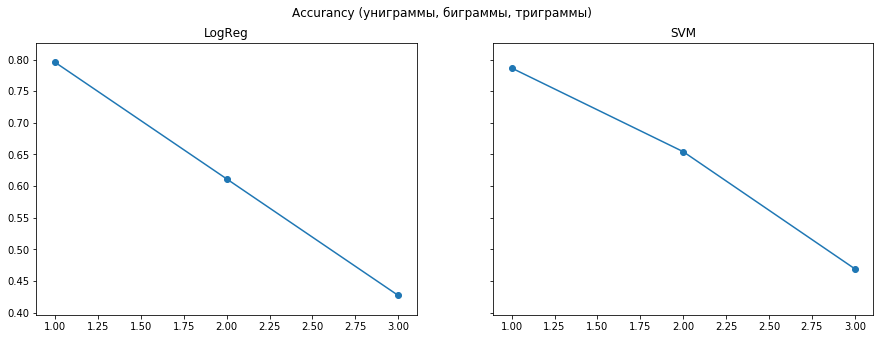

In [161]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))

ax[0].scatter(x = np.asarray(df1.columns), y = np.asarray(df1)[0])
ax[0].plot(np.asarray(df1.columns), np.asarray(df1)[0])
ax[1].scatter(x = np.asarray(df2.columns), y = np.asarray(df2)[0])
ax[1].plot(np.asarray(df2.columns), np.asarray(df2)[0])
ax[0].set_title('LogReg')
ax[1].set_title('SVM')
fig.suptitle('Accurancy (униграммы, биграммы, триграммы)')
plt.show()

Посчитав качество для отдельных n-грамм, следует, что более точными являются униграммы, что логично, так как учитывают значимость каждого слова (это верно и для LogReg, и для SVM)

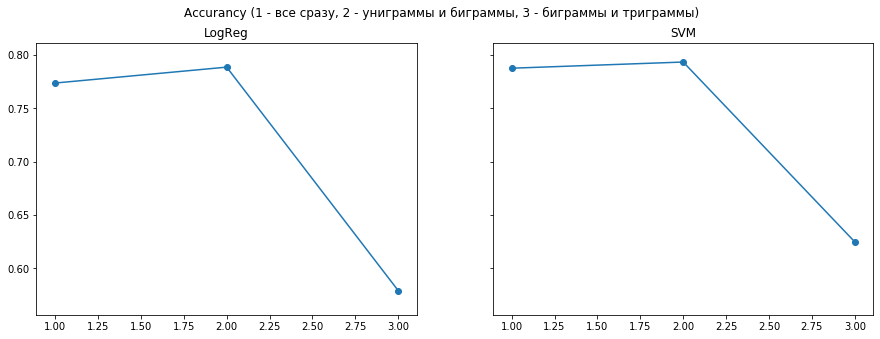

In [162]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))

ax[0].scatter(x = np.asarray(df12.columns), y = np.asarray(df12)[0])
ax[0].plot(np.asarray(df12.columns), np.asarray(df12)[0])
ax[1].scatter(x = np.asarray(df22.columns), y = np.asarray(df22)[0])
ax[1].plot(np.asarray(df22.columns), np.asarray(df22)[0])
ax[0].set_title('LogReg')
ax[1].set_title('SVM')
fig.suptitle('Accurancy (1 - все сразу, 2 - униграммы и биграммы, 3 - биграммы и триграммы)')
plt.show()

Посмотрев на разлчиные комбинации видно, что там, где используются униграммы, там качество лучше. 

Но тем не менее самое лучшее качество у отдельных униграмм в LogReg

# 2

Попробуем Word2Vec эмбеддинг

In [163]:
X_all_items[0]

['сапоги', '46', 'размер', 'новые', 'сапоги', '46', 'размер', 'новые']

In [164]:
from gensim.models.word2vec import Word2Vec

In [165]:
model = Word2Vec(X_all_items, min_count = 1)

In [166]:
def sentence_embedding(sentence: str, embedding_model) -> np.array:
    """
    Складывает вектора токенов строки sentence
    """
    dim = embedding_model['привет'].shape[0]
    vector_embd = np.zeros(dim)
    for token in tokenizer.tokenize(sentence):
        if token in embedding_model:
            vector_embd += embedding_model[token]
    return vector_embd
def items_to_embed_w2v(items: np.array, embedding_model) -> np.array:
    """
    Для каждого товара возвращает его embedding вектор
    """
    narek = []
    embed_narek = []
    for i in range(len(items)):
        narek.append(items[i][0] + ' ' + items[i][1])
    for i in range(len(items)):
        embed_narek.append(sentence_embedding(narek[i], embedding_model))
    return np.asarray(embed_narek)

In [167]:
X_train_embed_w2v = items_to_embed_w2v(X_train, model)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [168]:
X_test_embed_w2v= items_to_embed_w2v(X_test, model)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [169]:
from scipy.sparse import csr_matrix
X_train_embed_w2v = csr_matrix(X_train_embed_w2v)
X_test_embed_w2v = csr_matrix(X_test_embed_w2v)

In [170]:
LogReg.fit(X_train_embed_w2v, y_train)
y_pred_embed_w2v = LogReg.predict(X_test_embed_w2v)
accuracy_score(y_test, y_pred_embed_w2v)

0.5766666666666667

In [171]:
SVM.fit(X_train_embed_w2v, y_train)
y_pred_embed2_w2v = SVM.predict(X_test_embed_w2v)
accuracy_score(y_test, y_pred_embed2_w2v)

0.2921111111111111

**Вывод:** Как и в другом эмбеддинге качество низкое, что связано с самим методом эмбеддинга, который не подходит под наши данные

# 3, 4, 5

Выберем токенизатор *RegexpTokenizer*, который удаляет все знаки препинания

Далее подключим pymorphy, из которого для слов сделаем *MorphAnalyzer* (что-то похожее делали уже в стемминге выше, но здесь будут выводиться изначальные формы слов)

Попробуем методы bow и tf-idf (второй лучше), для которого подберем гиперпараметры и доведем качество до 0.82

In [172]:
from nltk.tokenize import RegexpTokenizer 
tokeny = RegexpTokenizer(r'\w+') 
tokeny.tokenize('Eighty-seven miles to go, yet. Onward!') 

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']

In [173]:
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install DAWG-Python

In [174]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [175]:
tokenized_example = tokeny.tokenize('Eighty-seven miles to go, yet. Onward!') 

In [176]:
ana = pymorphy2_analyzer.parse(tokenized_example[3])
ana[0].normal_form

'to'

In [177]:
def items_tokenize(stroka):
    example = tokeny.tokenize(stroka)
    easy = []
    for i in range(len(example)):
        ana = pymorphy2_analyzer.parse(example[i])
        easy.append(ana[0].normal_form)
    return easy

In [178]:
items_tokenize('Eighty-seven miles to go, yet. Onward!')

['eighty', 'seven', 'miles', 'to', 'go', 'yet', 'onward']

In [179]:
def preprocess_py(text: str) -> str:
    t = items_tokenize(text.lower())
    return ' '.join(t)

In [180]:
X_train_py = []
for i in range(len(X_train)):
    X_train_py.append([preprocess_py(X_train[i][0]), preprocess_py(X_train[i][1])])
X_test_py = []
for j in range(len(X_test)):
    X_test_py.append([preprocess_py(X_test[j][0]), preprocess_py(X_test[j][1])])

In [181]:
X_all_py = []
for i in range(len(X_train)):
    X_all_py.append(X_train_py[i][0].split(' '))
    X_all_py.append(X_train_py[i][1].split(' '))

In [182]:
tokens_cnt_py = {}
for token in X_all_py:
    for toks in token:
        try:
            tokens_cnt_py.update({toks: tokens_cnt_py[toks] + 1})
        except KeyError:
            tokens_cnt_py.update({toks: 1})

In [183]:
new_dict_py = {}
tokens_list_py =[]
b = sorted(list(tokens_cnt_py.items()), key=lambda x: x[1])[-10000:]
for para in b:
    new_dict_py.update({para[0]: para[1]})
    tokens_list_py.append(para[0])
tokens_cnt_py = new_dict_py

In [184]:
X_train_bow_py = des_to_bow(X_train, tokens_list_py)
X_test_bow_py = des_to_bow(X_test, tokens_list_py)

In [185]:
X_train_bow_py = csr_matrix(X_train_bow_py)

In [186]:
X_test_bow_py = csr_matrix(X_test_bow_py)

In [187]:
LogReg.fit(X_train_bow_py, y_train)
y_pred_py = LogReg.predict(X_test_bow_py)
accuracy_score(y_test, y_pred_py)

0.7308888888888889

In [188]:
SVM.fit(X_train_bow_py, y_train)
y_pred_py2 = SVM.predict(X_test_bow_py)
accuracy_score(y_test, y_pred_py2)

0.7222222222222222

In [189]:
X_all_items_py = []
for i in range(len(X_train_py)):
    X_all_items_py.append(X_all_py[2*i] + X_all_py[2*i+1])

In [190]:
word_document_cnt_py = {}
for token in tokens_list_py:
    i = 0
    for toks in X_all_items_py:
        if token in toks:
            i += 1
    word_document_cnt_py.update({token: i})

In [191]:
def text_to_tfidf(text: str, word_document_cnt: dict, tokens_list: list, n_documents_total: int) -> np.array:
    """
    Возвращает вектор, где для каждого слова из словаря
    указан tf-idf
    """
    vector_TF = np.zeros(len(tokens_list))
    spisok = text.split(' ')
    for i in spisok:
        try:
            TF = spisok.count(i) / len(spisok)
            vector_TF[tokens_list.index(i)] = TF
        except ValueError:
            pass
            
    vector_IDF = np.zeros(len(tokens_list))
    for i in spisok:
        try:
            IDF = np.log(n_documents_total / word_document_cnt[i])
            vector_IDF[tokens_list.index(i)] = IDF
        except KeyError or ValueError:
            pass
      
    vector = np.zeros(len(tokens_list))
    for i in range(len(tokens_list)):
        vector[i] = vector_TF[i] * vector_IDF[i]
    return vector

In [192]:
def items_to_tfidf(items: np.array, word_document_cnt: dict, tokens_list: list, n_documents_total: int) -> np.array:
    """
    Для каждого товара возвращает его tf-idf вектор
    """
    respek = []
    tf_idf_respek = []
    for i in range(len(items)):
        respek.append(items[i][0] + ' ' + items[i][1])
    for i in range(len(items)):
        tf_idf_respek.append(text_to_tfidf(respek[i], word_document_cnt, tokens_list, n_documents_total))
    return np.asarray(tf_idf_respek)

In [193]:
X_train_tfidf_py = items_to_tfidf(X_train_py, word_document_cnt_py, tokens_list_py, len(X_train_py))

In [194]:
X_test_tfidf_py = items_to_tfidf(X_test_py, word_document_cnt_py, tokens_list_py, len(X_train_py))

In [195]:
X_train_tfidf_py = csr_matrix(X_train_tfidf_py)
X_test_tfidf_py = csr_matrix(X_test_tfidf_py)

In [196]:
LogReg.fit(X_train_tfidf_py, y_train)
y_pred_tfidf_py = LogReg.predict(X_test_tfidf_py)
accuracy_score(y_test, y_pred_tfidf_py)

0.7407777777777778

In [197]:
SVM.fit(X_train_tfidf_py, y_train)
y_pred_tfidf2_py = SVM.predict(X_test_tfidf_py)
accuracy_score(y_test, y_pred_tfidf2_py)

0.8186666666666667

In [198]:
SVM3 = sklearn.svm.LinearSVC(C = 0.8)
SVM3.fit(X_train_tfidf_py, y_train)
y_pred_tfidf3_py = SVM3.predict(X_test_tfidf_py)
accuracy_score(y_test, y_pred_tfidf3_py)

0.8204444444444444

**Вывод:** Метод TF-IDF лучше Bow, комбинация хорошего препроцессинга (убрать лишнее, например знаки препинания), стемминга и морфного анализа помогают решить задачу

# Ну вот и все, победа! Ура, спасибо за внимание!